In [1]:
import numpy as np
from fractions import Fraction

# 1. Introduction to Vectors

### 1.1 Vector Dot Products

The dot product of v = (v<sub>1</sub>, v<sub>2</sub>) and w=(w<sub>1</sub>,w<sub>2</sub>) is the number <b>v . w:</b> 

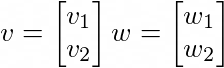

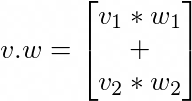

The dot product is essential in linear algebra. It tells us about the angle between two vectors. <br>
<br>
When the dot product = 0 -> the two vectors are perpendicular. <br>
When the dot product > 0 -> there is an acute angle between the vectors. <br>
When the dot product < 0 -> there is an obtuse angle between the vectors. <br>

The dot product of v = (-1, 2) and w = (3, 1) = 5 <br>
<br>
(-1\*3) + (2\*1) = 5 <br>
<br>
The above manual calculation can be implemented using np.dot()

In [54]:
v = np.array([1, 2])
w = np.array([3, 1])

np.dot(v,w)

5

We can also implement this manually by indexing the array directly. Obviously this is not practical for vectors in high dimensional spaces but it is good to understand what the numpy implementation is doing.

In [19]:
v[0]*w[0] + v[1]*w[1]

5

### 1.2 Vector Length

An important case is the dot product of a vector with itself. In this case the dot product actually returns the length of the vector.

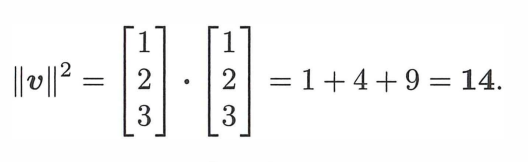

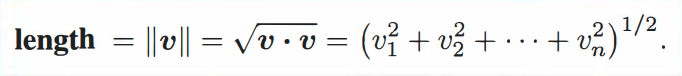

Another important vector is called the unit vector, this is any vector with length 1. The standard unit vectors along the x and y axes are written as <i>i</i> and <i>j</i>, where i = (1,0) and j = (0, 1). 

Again we can use the np.dot() formula to find the length of a vector using python.

In [23]:
v = np.array([1, 2, 3])

np.dot(v,v)

14

It's important to note that this returns the <b>squared</b> length, so to get the actual length you must square root the result. We can do so by using the np.sqrt() function.

In [25]:
np.sqrt(np.dot(v,v))

3.7416573867739413

### 1.3 Angles between vectors

As discussed earlier the dot product between two vectors is used to find the angle between them. We can further this understanding by looking at cosine similarity, which is given by the formula below:

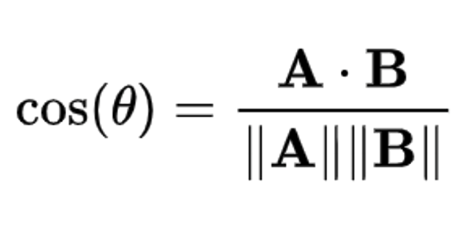

Again we can implement the above using numpy, however there is no direct function for cosine simiarity. We can break it into smaller chuncks and achieve the answer.

In [48]:
def cosine_sim(A,B):
    # np.linalg.norm() is a replacement for np.dot(A,A)
    return np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

In [39]:
A = np.array([2, 1])
B = np.array([1, 2])

Fraction(cosine_sim(A,B)).limit_denominator()

Fraction(4, 5)

We now introduce the Schwarz and Triangle inequality that arise from the property that |cos$\theta$| cannot exceed 1.

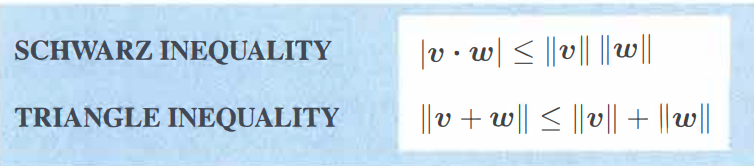

The only situation in which both sides of the schwarz inequality are equal is when either <i>v</i> or <i>w</i> are scalar multiples of the other. 

Lets see an example of the Schwarz inequality below:

In [57]:
v = np.array([2, 1])
w = np.array([1, 2])

print("The dot product of v.w: ",np.dot(v,w))
print("The length of v and w multiplied is: ", round(np.linalg.norm(v)*np.linalg.norm(B),0))

The dot product of v.w:  4
The length of v and w multiplied is:  5.0


4 < 5. Therefore the Schwarz inequality is true.

Using the same vectors we will test the Triagle inequality.

In [69]:
print("The length of v + w is:", round(np.linalg.norm((v+w)),2))
print("The length of v and w added is: ", round(np.linalg.norm(v)+np.linalg.norm(w),3))

The length of v + w is: 4.24
The length of v and w added is:  4.472


4.24 < 4.472 so the Triangle inequality is also true.

# 2. Introduction to Matrices

The three vectors below:

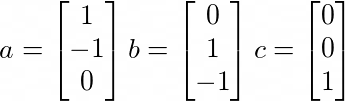

Can be combined to make the following matrix:

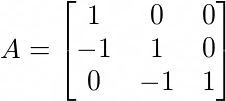

Looking more generally we can show that a matrix <i>A</i> acts on a vector <i>x</i> to produce an output <i>b</i> <i>(Ax = b)</i>. An example is the below:

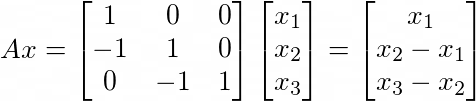

We can implement the <i>Ax</i> calculation by using np.dot() since b can be found by doing row dot products.

In [7]:
A = np.array([
    [1, 0, 0],
    [-1, 1, 0],
    [0, -1, 1]
])

x = np.array([1, 2, 3])

b = np.dot(A,x)
b

array([1, 1, 1])

In this case <i>A</i> is known as a "difference matrix" because it is responsible for transforming vector <i>x</i> into vector <i>b</i>. Given that we now know this general form, it is also possible for us to take a given matrix <i>A</i> and an output vector <i>b</i> and find the input vector <i>x</i>. We can do so by finding the inverse of matrix <i>A</i> and multiplying it by the output vector <i>b</i>.

### 2.1 The Inverse Matrix

We can derive the inversion matrix in the following manner:

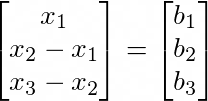

By solving for each value of x we will arrive at:

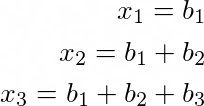

We can then create our inverted matrix from the above:

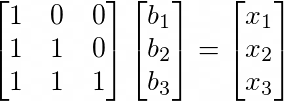

We can invert a matrix using numpys linalg.inv() function.

In [8]:
np.linalg.inv(A)

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.]])

As you can see it returns the same inverted matrix that was derived! Not all matrices will be so easy to solve but this provides a good intuition as to how to invert a matrix and how that in turn allows us to find an input vector given a transformation matrix and the output vector. Interestingly np.lingalg.inv() actually calls np.linalg.solve() with the original matrix and its corresponding identity matrix. This works due to fact that when you multiply a matrix with its inverted matrix, it returns the identity matrix.

In [11]:
np.linalg.solve(A,np.identity(3))

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.]])

### 2.2 Independence and Dependence

The matrix used in the examples above is a triangular matrix which makes it very easy to solve. However some matrices are known as cyclic matrices and either have an infinite amount of solutions, or no solutions. See the example below:

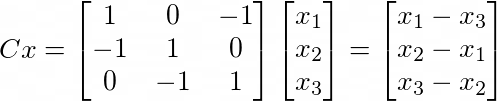

There is no way to eliminate the terms to be able to isolate any value of x. This can be explained geometrically as well, where the three vectors that form the matrix C do not fill all of three dimensional space. One of the vectors lies on the plane that is formed by the other two vectors.<br>
<br>
<b>Independence:</b> Is when one vector is a linear combination of other vectors.<br>
<b>Dependence:</b> Is when none of the vectors are a linear combination of one another. <br>
<br>
When a matrix has independent columns you will be able to find its inversion matrix. However in the case of a matrix with dependent columns, the matrix is not invertible and is referred to as a <b>singular</b> matrix.

We can use the numpy function np.linalg.det() to determine whether a matrix has independent or dependent columns. Singular matrices have a determinant of 0, whereas invertible matrices have a determinant of 1.

In [19]:
C = np.array([
    [1,0,-1],
    [-1,1,0],
    [0,-1,1]
])

In [20]:
np.linalg.det(C)

0.0